In [79]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [80]:
#Read files
trainfile = r'/gdrive/My Drive/CIS508/Assignment-4/Sales_Transactions_Dataset_Weekly.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe

print(trainData.shape)
print(trainData.dtypes)
print(trainData.head())





(811, 107)
Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object
  Product_Code  W0  W1  ...  Normalized 49  Normalized 50  Normalized 51
0           P1  11  12  ...           0.17           0.11           0.39
1           P2   7   6  ...           0.10           0.60           0.00
2           P3   7  11  ...           0.45           0.45           0.36
3           P4  12   8  ...           0.35           0.29           0.35
4           P5   8   5  ...           0.53           0.33           0.40

[5 rows x 107 columns]


In [81]:
X_train=trainData.iloc[:,55:108].copy()
print(X_train.shape)
print(X_train.dtypes)
print(X_train.head())



(811, 52)
Normalized 0     float64
Normalized 1     float64
Normalized 2     float64
Normalized 3     float64
Normalized 4     float64
Normalized 5     float64
Normalized 6     float64
Normalized 7     float64
Normalized 8     float64
Normalized 9     float64
Normalized 10    float64
Normalized 11    float64
Normalized 12    float64
Normalized 13    float64
Normalized 14    float64
Normalized 15    float64
Normalized 16    float64
Normalized 17    float64
Normalized 18    float64
Normalized 19    float64
Normalized 20    float64
Normalized 21    float64
Normalized 22    float64
Normalized 23    float64
Normalized 24    float64
Normalized 25    float64
Normalized 26    float64
Normalized 27    float64
Normalized 28    float64
Normalized 29    float64
Normalized 30    float64
Normalized 31    float64
Normalized 32    float64
Normalized 33    float64
Normalized 34    float64
Normalized 35    float64
Normalized 36    float64
Normalized 37    float64
Normalized 38    float64
Normalized 39  

***Method1: Default K-Means Clustering***

In [82]:
#K-Means Clustering ========================================================================
#Default Mode - K=8
kmeans = KMeans()
kmeans.fit(X_train)

#kmeans.cluster_centers_
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))
kmeans.labels_


0.039926089432542014


array([5, 5, 4, 5, 6, 1, 5, 5, 4, 5, 5, 5, 4, 1, 4, 4, 4, 4, 4, 5, 4, 4,
       5, 4, 5, 1, 4, 4, 5, 4, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4,
       5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4,
       4, 5, 4, 4, 4, 4, 4, 6, 5, 4, 5, 4, 5, 5, 1, 5, 5, 6, 4, 4, 4, 4,
       4, 4, 5, 4, 5, 1, 1, 5, 4, 1, 6, 0, 4, 4, 4, 5, 5, 1, 5, 6, 5, 5,
       6, 5, 4, 4, 4, 1, 6, 6, 4, 4, 5, 5, 5, 5, 5, 5, 6, 4, 4, 4, 4, 5,
       4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 1, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 1,
       1, 1, 6, 1, 4, 1, 6, 1, 1, 1, 1, 1, 4, 3, 7, 2, 2, 7, 3, 7, 7, 3,
       7, 7, 2, 3, 3, 2, 2, 2, 2, 2, 7, 2, 2, 2, 7, 2, 2, 3, 2, 7, 3, 7,
       2, 2, 2, 2, 2, 7, 2, 2, 2, 7, 2, 2, 7, 2, 3, 2, 2, 2, 1, 1, 6, 1,
       6, 1, 1, 1, 1, 6, 6, 2, 2, 2, 2, 2, 3, 7, 2, 7, 6, 3, 3, 4, 1, 1,
       3, 0, 3, 7, 6, 6, 6, 6, 1, 1, 6, 1, 4, 5, 6,

In [83]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(df_kmeans)
df_kmeans['Cluster Number']=kmeans_predict_train
print(df_kmeans.shape)
df_kmeans.head()
df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS508/Assignment-4/Results/Sales_Transactions_ResultsA.csv')


(811, 53)


***Method2: K-Means using manual tuning of hyperparameters***

In [99]:
#K-Means Clustering ========================================================================
#K=3

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
kmeans.labels_
#kmeans.cluster_centers_
print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

(811, 53)
0.25539689924325626


In [100]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(X_train)

df_kmeans['Cluster Number']=kmeans_predict_train
print(df_kmeans.shape)
df_kmeans.head()
df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS508/Assignment-4/Results/Sales_Transactions_ResultsB1.csv')

(811, 53)


In [101]:
#K-Means Clustering ========================================================================
#K=3

kmeans = KMeans(n_clusters=3, init='k-means++', n_init =10)
kmeans.fit(X_train)
kmeans.labels_
#kmeans.cluster_centers_
print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

(811, 53)
0.16348314266078


In [102]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(X_train)

df_kmeans['Cluster Number']=kmeans_predict_train
print(df_kmeans.shape)
df_kmeans.head()
df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS508/Assignment-4/Results/Sales_Transactions_ResultsB2.csv')

(811, 53)


***Method3: K-Means using RandomizedSearch tuning of hyperparameters - best - optional***

In [107]:
#Hyperparameter tuning done for K Means
kmeans = KMeans()
parameters={
    'n_clusters': range(1,5,1),
    'init': ['k-means++', 'random'],
    'algorithm': ['auto', 'full','elkan']
    }
kmeans = RandomizedSearchCV(kmeans,parameters,n_iter=15)
kmeans.fit(X_train)
grid_parm_kmeans=kmeans.best_params_
print(grid_parm_kmeans)

{'n_clusters': 4, 'init': 'k-means++', 'algorithm': 'full'}


In [108]:
#K-Means Clustering after hyperparameter tuning ========================================================================

kmeans = KMeans(**grid_parm_kmeans)
kmeans.fit(X_train)
kmeans.labels_
print(X_train.shape)
print(silhouette_score(X_train, kmeans.labels_))

(811, 53)
0.10450189403445602


In [109]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(X_train)

df_kmeans['Cluster Number']=kmeans_predict_train
print(df_kmeans.shape)
df_kmeans.head()
df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS508/Assignment-4/Results/Sales_Transactions_ResultsC.csv')

(811, 53)


***Method4: Identifying K using Elbow method***

1.   Low SSE
2.   High Silhouette score



In [91]:
SumOfSquaredError = []
K = range(2,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    SumOfSquaredError.append(kmeans.inertia_)
print(SumOfSquaredError)

[3987.97988340019, 3309.117130780139, 2840.6746729835872, 2543.4299952730685, 2294.1595703219796, 2111.8115711546293, 2091.257055737428, 2079.6501954677196, 2066.1383705820795, 2058.819260029672, 2049.5903426068053, 2036.223873801249, 2023.364524474724, 2008.8726981792083, 2008.9335831180072, 1991.8546968213723, 1989.4118986087344, 1975.837108197811, 1973.9661311497368, 1960.0247627826175, 1957.2330093935166, 1947.9582579423957, 1938.810894322946, 1931.2599451869125, 1931.8149467094825, 1917.662936406292, 1914.3711008067912, 1911.3380031737775, 1903.6491019245645, 1892.7851419482386, 1892.6675430222472, 1875.744435121615, 1868.959466857149, 1868.0788786045468, 1850.778210710414, 1856.4927602124403, 1856.1589325224218, 1852.9706926482081, 1845.8249149056414, 1840.0418336532703, 1828.1975935370838, 1821.564463825731, 1812.9530426428914, 1814.4387325443206, 1806.867017842154, 1806.3509360660491, 1788.0885633214539, 1794.095492270246]


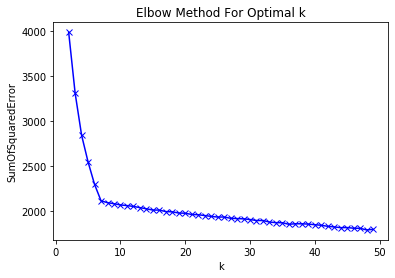

In [92]:
plt.plot(K, SumOfSquaredError, 'bx-')
plt.xlabel('k')
plt.ylabel('SumOfSquaredError')
plt.title('Elbow Method For Optimal k')
plt.show()

In [93]:
SumOfSquaredError = []
K = range(2,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    SumOfSquaredError.append(kmeans.inertia_)
print(SumOfSquaredError)

[3987.97988340019, 3309.117130780139, 2840.6746729835872, 2543.4299952730685, 2294.1595703219796, 2111.8115711546293, 2091.3858453222274, 2078.5897719111595, 2066.3620276573724, 2061.150463436152, 2042.7819017743022, 2031.0309165189021, 2020.7125290736435]


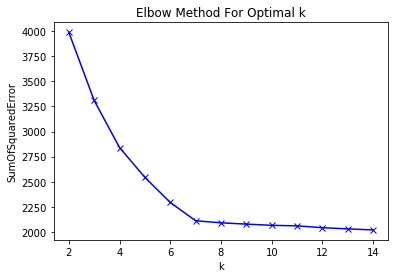

In [94]:
plt.plot(K, SumOfSquaredError, 'bx-')
plt.xlabel('k')
plt.ylabel('SumOfSquaredError')
plt.title('Elbow Method For Optimal k')
plt.show()

In [95]:
silhouette_score_list= []
K = range(2,50)
for n in K:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_train)
    #a= silhouette_score(X_train, km.labels_,metric='euclidean')
    silhouette_score_list.append(silhouette_score(X_train, kmeans.labels_,metric='euclidean'))
print(silhouette_score_list)

[0.34346302945297674, 0.25539689924325626, 0.2828046687166683, 0.2535474730219587, 0.24125001221349263, 0.26458824086833505, 0.23437846971660772, 0.18854946831599612, 0.17529243985226356, 0.13094503428494597, 0.15081279201518977, 0.09000656188947809, 0.10938054201047655, 0.05735857186890344, 0.05495358683089089, 0.036886711387755705, 0.03275994296071911, 0.036827386562354354, 0.04059286642577775, 0.03240876414801402, 0.028067349496534576, 0.03402929154121387, 0.04193794050548306, 0.029912866471388567, 0.028817673195556223, 0.024188748065127573, 0.04075437812571147, 0.03790199943705809, 0.024242220238570783, 0.028855014723622008, 0.020143280245096904, 0.025325431158004678, 0.02302616707018274, 0.0217340880783308, 0.02105899347331575, 0.02023045101520973, 0.022840973959843695, 0.02861183854883186, 0.022088721512822797, 0.02779826080409791, 0.023450006388233066, 0.01884722884096782, 0.02077631394616073, 0.018694839814974842, 0.03329350936978749, 0.02094626000089393, 0.02142333721412786, 0

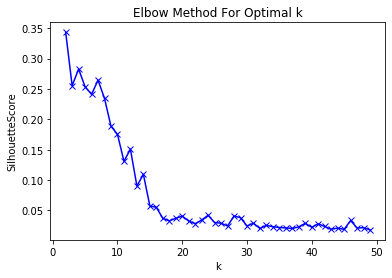

In [96]:
plt.plot(K, silhouette_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('SilhouetteScore')
plt.title('Elbow Method For Optimal k')
plt.show()

From Above graph optimal value of k=3 (from ELBOW RULE)

In [97]:
silhouette_score_list= []
K = range(2,15)
for n in K:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_train)
    #a= silhouette_score(X_train, km.labels_,metric='euclidean')
    silhouette_score_list.append(silhouette_score(X_train, kmeans.labels_,metric='euclidean'))
print(silhouette_score_list)

[0.34346302945297674, 0.25539689924325626, 0.2828046687166683, 0.2535474730219587, 0.24125001221349263, 0.26458824086833505, 0.2348440617827102, 0.18926264889924693, 0.15501612831482472, 0.12184782800994828, 0.13172683081673897, 0.09166734090373808, 0.043372261058843266]


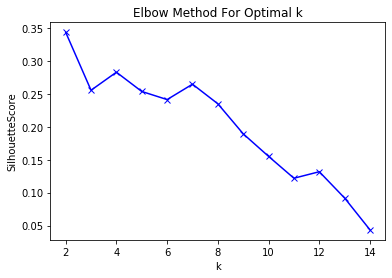

In [98]:
plt.plot(K, silhouette_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('SilhouetteScore')
plt.title('Elbow Method For Optimal k')
plt.show()